In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as sk
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('results.csv')
data = data.fillna({"TARGET_ACCOUNT": "UNKNOWN"})
data = data.fillna({"GDDB_ROLE_SPECIAL": "STANDARD"})
data.head()

,USERNAME,EVENT_ID,TARGET_ACCOUNT,TARGET_UNIQUE_ID,TARGET_GENDER,GDDB_ROLE,GDDB_ROLE_SPECIAL,LABEL
0,TROMMRE1,GDDB04,EUNET/BOHNSRO1,BOHNSRO1,Person,ROLE_GDDB_ADMINISTRATOR - none - HELPDESK,STANDARD,incident
1,TROMMRE1,GDDB04,EUNET/KOENIKO1,KOENIKO1,Person,ROLE_GDDB_ADMINISTRATOR - none - HELPDESK,STANDARD,incident
2,COLLAAR1,GDDB04,NANET/CUARTJO1,CUARTJO1,Person,ROLE_GDDB_ADMINISTRATOR - none - HELPDESK,STANDARD,incident
3,DUEBLDO1,GDDB02,EUNET/RELEA201,RELEA201,Person,ROLE_GDDB_MANAGER,STANDARD,exeption
4,DUEBLDO1,GDDB02,EUNET/ADM_RELEA201,RELEA201,Person,ROLE_GDDB_MANAGER,STANDARD,exeption


In [9]:
found = []
for index,dta in enumerate (data['TARGET_ACCOUNT']):
    m = re.search('/(.+?)_', dta)
    if m:
        found.append(m.group(1))
        data['TARGET_ACCOUNT'][index] = m.group(1)
        
ulist = list(set(found))

In [10]:
ta_mapping = dict.fromkeys(ulist)
for u in ulist:
    ta_mapping[u] = ulist.index(u)+1
    
data['TARGET_ACCOUNT'] = data['TARGET_ACCOUNT'].map(ta_mapping)
data = data.fillna({"TARGET_ACCOUNT": 0})

uid_mapping = {'PRASAPU1':1,'CHINKE1':1,'BANNENA3':1}
data['USERNAME'] = data['USERNAME'].map(uid_mapping)
data = data.fillna({"USERNAME": 0})

eventid_mapping = {'GDDB01':0, 'GDDB02':1, 'GDDB03':2, 'GDDB04':3}
data['EVENT_ID'] = data['EVENT_ID'].map(eventid_mapping)

tg_mapping = {'Person':0, 'Generic':1}
data['TARGET_GENDER'] = data['TARGET_GENDER'].map(tg_mapping)

role_mapping = {'ROLE_GDDB_MANAGER':0, 'ROLE_GDDB_ADMINISTRATOR_PLUS':1, 'ROLE_GDDB_ADMINISTRATOR - none - HELPDESK':2, 'ROLE_GDDB_ADMINISTRATOR - none':3}
data['GDDB_ROLE'] = data['GDDB_ROLE'].map(role_mapping)

srole_mapping = {'ROLE_GDDB_AD':0, 'ROLE_GDDB_LEGAL':1, 'STANDARD':2}
data['GDDB_ROLE_SPECIAL'] = data['GDDB_ROLE_SPECIAL'].map(srole_mapping)

label_mapping = {'incident':0, 'exeption':1}
data['LABEL'] = data['LABEL'].map(label_mapping)

data = data.drop('TARGET_UNIQUE_ID',axis=1)

In [11]:
x_data = data.drop('LABEL',axis=1)
labels = data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3, random_state=101)

X = X_train.values
Y = y_train.values

In [12]:
X

array([[  0.,   1.,   0.,   0.,   0.,   2.],
       [  0.,   2.,  13.,   1.,   1.,   0.],
       [  0.,   1.,   0.,   0.,   0.,   2.],
       ..., 
       [  0.,   3.,   0.,   0.,   1.,   0.],
       [  0.,   1.,   0.,   0.,   0.,   2.],
       [  0.,   2.,   0.,   1.,   0.,   2.]])

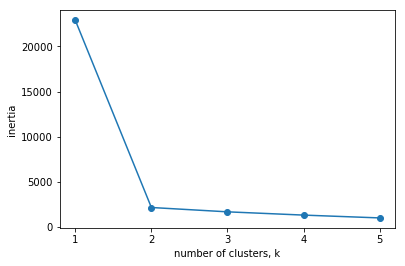

In [23]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()